> 高等数学上机实践

# 1-2 集合的运算

> 本节课通过引导学生下载并操作经典数据集 MNIST，理解集合的基本概念及其在机器学习中的实际应用。


首先我们加载所需要的库, rembg是一个基于AI模型进行背景去除的库(该算法主要基于Unet神经网络), 需要事先安装好, 例如可以使用如下命令:

'''
pip install rembg
'''

In [108]:

#AI自动去背景
from PIL import Image
import numpy as np
import rembg
import matplotlib.pyplot as plt

接下来我们载入一张卡皮巴拉的集体照.

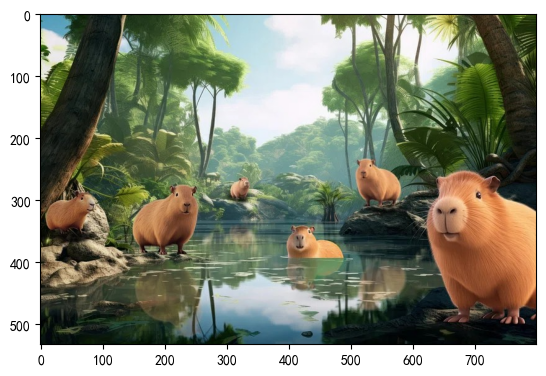

In [109]:
capy_group_photo = Image.open("./data/images/capy.jpg")
plt.imshow(capy_group_photo)

这张照片照的很好, 可惜有一只卡皮巴拉没有来, 突出一个拍照可以, 不拍也行的人设. 不过这也不是问题, 我们可以通过人工智能技术把这只睡过头的卡皮巴拉给P进照片里来. 主要分成以下几个步骤:

1. 找一张这个睡过头的卡皮巴拉的照片.
2. 基于AI进行照片的背景去除, 得到卡皮巴拉的mask (集合).
3. 通过集合运算对两张照片进行组合, 将卡皮巴拉放进集体照中.

### 1. 加载卡皮巴拉照片 

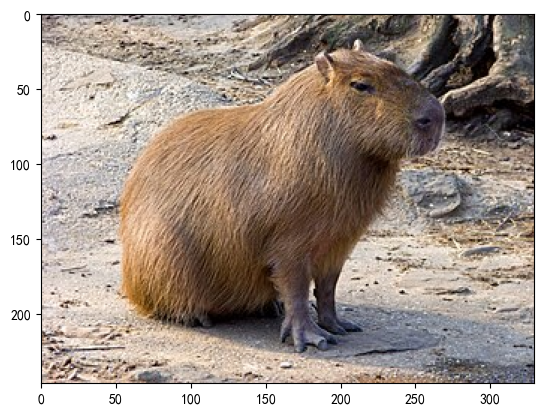

In [110]:
capy1_photo = Image.open("./data/images/capy_miss.jpg")
plt.imshow(capy1_photo)

### 2. 运用 AI 进行背景去除, 得到目标的 mask

[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


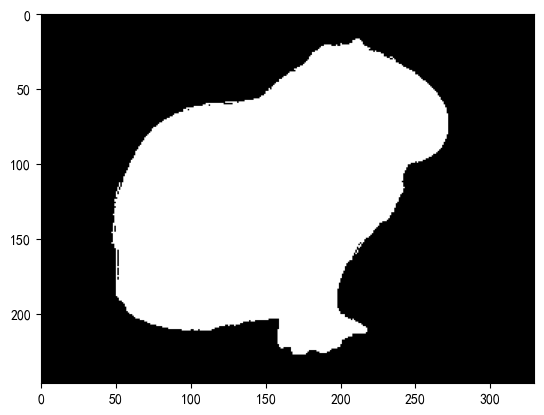

In [111]:

mask = np.bool(rembg.remove(capy1_photo, only_mask=True))
plt.imshow(mask, cmap="gray")
print(np.array(mask))

展示扣出来的卡皮巴拉效果.

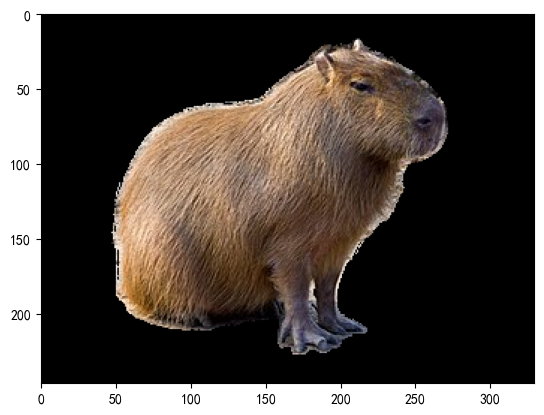

In [113]:

capy1 = capy1_photo * mask[:, :, np.newaxis]
plt.imshow(capy1)

### 3. 通过集合运算将卡皮巴拉放入集体照中.

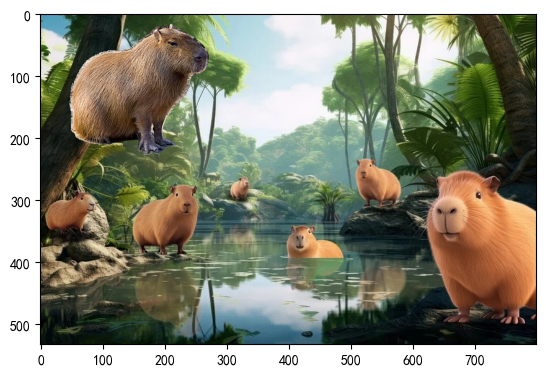

In [117]:
W, H = capy1_photo.size

# new_photo = np.zeros_like(capy_group_photo)
# new_mask = np.zeros_like(capy_group_photo)

# new_photo[0:H, 0:W, :] = capy1_photo
# new_mask[0:H, 0:W, :] = mask[:, :, np.newaxis]

# plt.imshow(new_photo)
# plt.imshow(new_mask[:, :, 0])

photo = np.array(capy_group_photo)
photo[0:H, 0:W, :] = capy1_photo * mask[:, :, np.newaxis]  + photo[0:H, 0:W, :] * ~mask[:, :, np.newaxis]
plt.imshow(photo)

## IoU（交并比）的定义与计算

\*\*交并比（Intersection over Union, IoU）\*\*是评价目标检测和分割任务中预测结果与真实标注重叠程度的常用指标。其定义与集合论吻合：对于两个掩码对应的集合 $A$（真值）和 $B$（预测），IoU 的计算公式为

$$
\mathrm{IoU}(A,B) \;=\; \frac{|A \cap B|}{|A \cup B|},
$$

即交集区域的面积（像素数）除以并集区域的面积。直观地说，IoU 衡量了预测区域与真实区域的重合程度，范围在 0 到 1 之间：IoU 越接近 1，表示预测区域与真实区域重合度越高；IoU 越接近 0，则表示两者几乎没有重叠。上面宇航员图像中两个掩码的交集和并集也可用来计算 IoU，例如：

```python
# 计算 IoU：交集像素数除以并集像素数
iou = intersection.sum() / union.sum()
print(f"IoU = {iou:.3f}")
```

这样我们就可以得到一个数值来量化预测与真实掩码的匹配程度。在目标检测领域，IoU 也常用于比较两个边界框：两个框的 IoU 反映它们的重叠比例。在实例分割/语义分割领域，IoU 有时也称为 Jaccard 指数，用来评价像素级别的预测准确度。在模型评估时，通常设定一个 IoU 阈值（例如 0.5），当预测结果与真值的 IoU 大于该阈值时，才视为一次**正确检测**。这样，IoU 直接体现了算法对目标位置和形状预测的精度：重叠越多、重合度越高，模型表现越好。

## 代码示例：掩码处理与IoU

下面示例代码创建两个简单掩码（可来自真实图片的阈值或其它方式），并可视化它们的交集、并集和补集区域，同时计算 IoU 值：


IoU(maskA, maskB) = 0.293


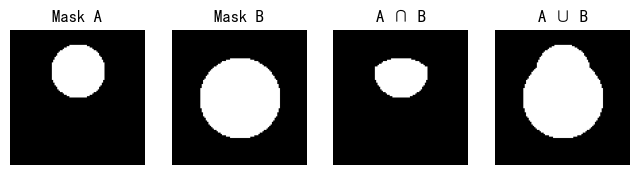

In [118]:
import numpy as np
import matplotlib.pyplot as plt

# 构造示例二值掩码（这里直接用数组生成，也可以从图像分割得到）
maskA = np.zeros((100, 100), dtype=bool)
maskB = np.zeros((100, 100), dtype=bool)
# 比如绘制两个重叠的圆形掩码
yy, xx = np.meshgrid(np.arange(100), np.arange(100))
maskA[(xx-30)**2 + (yy-50)**2 < 20**2] = True  # 圆心(30,50)，半径20
maskB[(xx-50)**2 + (yy-50)**2 < 30**2] = True  # 圆心(50,50)，半径30

# 计算集合运算
intersection = maskA & maskB
union = maskA | maskB
complementA = ~maskA

# 计算 IoU
iou_value = intersection.sum() / union.sum()
print(f"IoU(maskA, maskB) = {iou_value:.3f}")

# 可视化
fig, axs = plt.subplots(1, 4, figsize=(8,2))
axs[0].imshow(maskA, cmap='gray');     axs[0].set_title('Mask A')
axs[1].imshow(maskB, cmap='gray');     axs[1].set_title('Mask B')
axs[2].imshow(intersection, cmap='gray'); axs[2].set_title('A ∩ B')
axs[3].imshow(union, cmap='gray');      axs[3].set_title('A ∪ B')
for ax in axs:
    ax.axis('off')
plt.show()

上述代码中，我们用 NumPy 创建了两个二值掩码 `maskA`、`maskB`（分别是两个圆形区域），然后计算它们的交集和并集，并打印出 IoU 值。运行结果显示，**交集**区域（`A ∩ B`）即为两个圆形重叠的部分，**并集**区域（`A ∪ B`）是所有被任一圆形覆盖的区域，而两者面积之比就是 IoU。通过这种图形化展示，大学一年级同学能直观理解交并比的含义：IoU 本质上就是两个掩码区域重叠部分占全部覆盖区域的比例。

## 在 AI 中的应用

在目标检测、实例分割或语义分割等 AI 任务中，交并比有着重要的几何意义。它反映了模型预测区域与真实标注在空间上的重合程度。例如，在目标检测中，一个预测框只有当它与真实框的 IoU 高于阈值（如0.5）时，才被算作正确识别。在语义分割中，像素级的 IoU（Jaccard 指数）衡量预测的分割掩码与真实掩码的一致程度。较高的 IoU 表明模型在精确定位目标和分割边界上更为准确；反之，较低的 IoU 可能意味着错位或形变较大。